# Step1. About this problem
In this problem, we’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. <br>
     - Type of learning : Supervised learning<br>
     - Type of task     : Binary classification<br>
     - Data type        : Natural Language<br>
   source: https://www.kaggle.com/c/nlp-getting-started/overview

# Step2. Extracting word features and show Exploratory Data Analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import itertools
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('all')

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [3]:
train_data = pd.read_csv('drive/My Drive/Colab Notebooks/DTSA_5511_WEEK4/train.csv')
test_data = pd.read_csv('drive/My Drive/Colab Notebooks/DTSA_5511_WEEK4/test.csv')
sample_data = pd.read_csv('drive/My Drive/Colab Notebooks/DTSA_5511_WEEK4/sample_submission.csv')

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


-> Train_data has only 5 columns.

In [ ]:
print(train_data.info())
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


-> Train_data has 7613 records. The 'keyword'and 'location' column have a lot of null records.

In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print(test_data.info())
print(test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
id             0
keyword       26
location    1105
text           0
dtype: int64


-> Train_data has 3263 records and also has a lot of null records.

In [ ]:
sample_data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


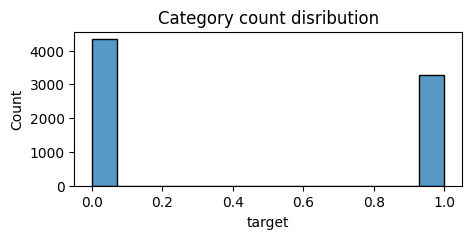

In [ ]:
plt.figure(figsize=(5, 2))
sns.histplot(train_data, x = 'target')
plt.title('Category count disribution')
plt.show()

-> There are two taeget values, with slightly more zero value samples.

In [ ]:
print('Text:\n{}'.format(train_data['text'][0]))

Text:
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


-> Text column contains short text.

Word Count
keyword
fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: count, dtype: int64
--------------------------------------------------
Word Ratio
keyword
fatalities    0.595869
deluge        0.556144
armageddon    0.556144
sinking       0.542903
damage        0.542903
Name: count, dtype: float64
--------------------------------------------------


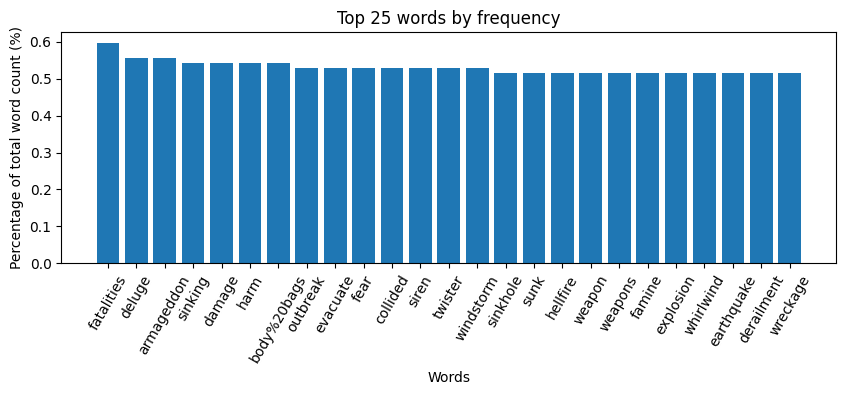

In [ ]:
w = train_data['keyword'].value_counts()
print("Word Count")
print(w.head())
print("-"*50)
# Divides each element of a Text column into words separated by whitespace characters and returns a data frame with each word expanded as a new column.

l = w[:25]/np.sum(w)*100
print("Word Ratio")
print(l.head())
print("-"*50)

plt.figure(figsize=(10,3))
plt.bar(l.index, l.values)
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Percentage of total word count (%)')
plt.title('Top 25 words by frequency')
plt.show()

-> Even the largest keywords account for only about 0.6% of the total, and there is little variation in the number of keywords.

Word Count
location
USA              104
New York          71
United States     50
London            45
Canada            29
Name: count, dtype: int64
--------------------------------------------------
Word Ratio
location
USA              2.047244
New York         1.397638
United States    0.984252
London           0.885827
Canada           0.570866
Name: count, dtype: float64
--------------------------------------------------


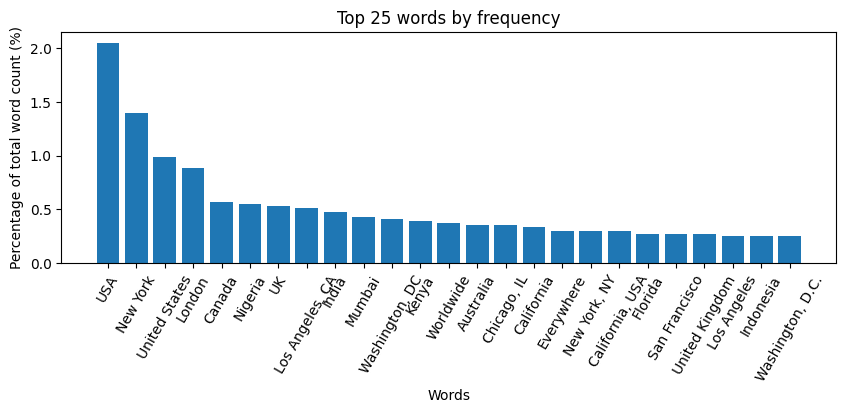

In [ ]:
w = train_data['location'].value_counts()
print("Word Count")
print(w.head())
print("-"*50)
# Divides each element of a Text column into words separated by whitespace characters and returns a data frame with each word expanded as a new column.

l = w[:25]/np.sum(w)*100
print("Word Ratio")
print(l.head())
print("-"*50)

plt.figure(figsize=(10,3))
plt.bar(l.index, l.values)
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Percentage of total word count (%)')
plt.title('Top 25 words by frequency')
plt.show()

->Location columns are a mixture of countries and regions. Overall, most are related to the United States.

Word Count
the    2575
a      1845
to     1805
in     1757
of     1722
Name: count, dtype: int64
--------------------------------------------------
Word Ratio
the    2.269502
a      1.626109
to     1.590855
in     1.548550
of     1.517702
Name: count, dtype: float64
--------------------------------------------------


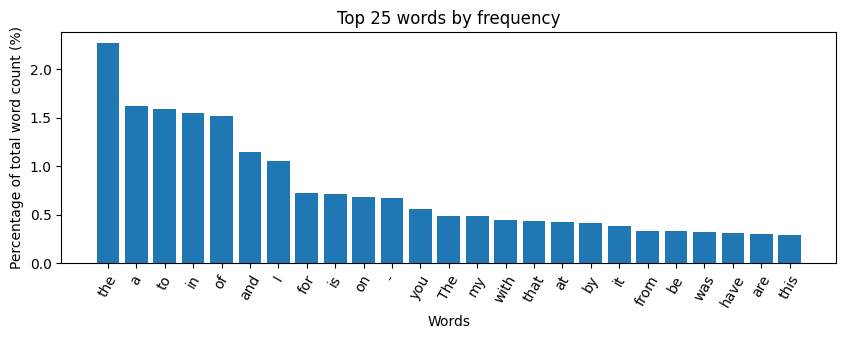

In [ ]:
w = train_data['text'].str.split(expand=True).unstack().value_counts()
print("Word Count")
print(w.head())
print("-"*50)
# Divides each element of a Text column into words separated by whitespace characters and returns a data frame with each word expanded as a new column.

l = w[:25]/np.sum(w)*100
print("Word Ratio")
print(l.head())
print("-"*50)

plt.figure(figsize=(10,3))
plt.bar(l.index, l.values)
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Percentage of total word count (%)')
plt.title('Top 25 words by frequency')
plt.show()

-> Counting by splitting sentences in text columns by word, articles, prepositions, etc. are at the top of the list.

# Step3. Building and training model (Neural Network model).
The following steps were used to create the model:<br>
　- 1. Split a sentence in a text column into words<br>
　- 2. Convert words into a series of numbers<br>
　- 3. To unify the input data in 200 columns, zero was inputed to the missing parts.<br>
　- 4. Put the data of "3" into the LSTM model.<br>

In [4]:
train_data2, test_data2 = train_test_split(train_data, test_size = 0.2, random_state = 41)

In [6]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words,oov_token = '<OOV>')
tokenizer.fit_on_texts(train_data2["text"])

max_len = 200
train_sequences = tokenizer.texts_to_sequences(train_data2["text"])
train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = "post", truncating = "post")
test_sequences = tokenizer.texts_to_sequences(test_data2["text"])
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = "post", truncating = "post")

print("Original text :",train_data2["text"][0])
print("train_sequences :", train_sequences[0])
print("train_padded :", train_padded[0])

Original text : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
train_sequences : [5, 6046, 27, 37, 7, 5, 868, 9, 5, 148, 68, 27, 5, 1837, 9, 5, 2482, 3932]
train_padded : [   5 6046   27   37    7    5  868    9    5  148   68   27    5 1837
    9    5 2482 3932    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0

In [ ]:
# Adding EarlyStopping callback based on ROC AUC
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# build model
model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim=128))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

# Define a custom learning rate
custom_lr = 0.0003
custom_optimizer = Adam(learning_rate=custom_lr)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history1 = model.fit(train_padded, train_data2['target'], epochs = 100, batch_size=256, validation_data=(test_padded, test_data2['target']), callbacks=[early_stopping])

Epoch 1/100
24/24 [==============================] - 43s 2s/step - loss: 0.6845 - accuracy: 0.5697 - val_loss: 0.6847 - val_accuracy: 0.5693
Epoch 2/100
24/24 [==============================] - 35s 1s/step - loss: 0.6837 - accuracy: 0.5706 - val_loss: 0.6845 - val_accuracy: 0.5693
Epoch 3/100
24/24 [==============================] - 35s 1s/step - loss: 0.6836 - accuracy: 0.5706 - val_loss: 0.6827 - val_accuracy: 0.5693
Epoch 4/100
24/24 [==============================] - 41s 2s/step - loss: 0.6829 - accuracy: 0.5706 - val_loss: 0.6816 - val_accuracy: 0.5693
Epoch 5/100
24/24 [==============================] - 38s 2s/step - loss: 0.6812 - accuracy: 0.5723 - val_loss: 0.6796 - val_accuracy: 0.5777
Epoch 6/100
24/24 [==============================] - 36s 2s/step - loss: 0.6659 - accuracy: 0.6035 - val_loss: 0.5628 - val_accuracy: 0.7533
Epoch 7/100
24/24 [==============================] - 35s 1s/step - loss: 0.5179 - accuracy: 0.7919 - val_loss: 0.5059 - val_accuracy: 0.7926
Epoch 8/100
2

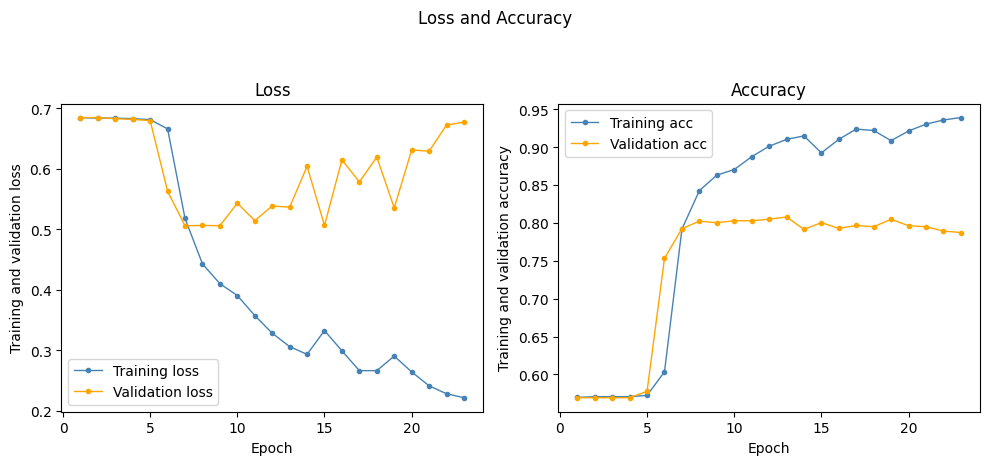

In [ ]:
# display the loss and accuracy curves

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot
n_factor = range(0,100)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Loss and Accuracy")

# Plot loss scores
ax[0, 0].set_title("Loss")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("Training and validation loss")
ax[0, 0].plot(epochs, loss, marker=".", color="steelblue", lw=1, label="Training loss")
ax[0, 0].plot(epochs, val_loss, marker=".", color="orange", lw=1, label="Validation loss")
ax[0, 0].legend()

# Plot accuracy scores
ax[0, 1].set_title("Accuracy")
ax[0, 1].set_xlabel("Epoch")
ax[0, 1].set_ylabel("Training and validation accuracy")
ax[0, 1].plot(epochs, acc, marker=".", color="steelblue", lw=1, label="Training acc")
ax[0, 1].plot(epochs, val_acc, marker=".", color="orange", lw=1, label="Validation acc")
ax[0, 1].legend()

# Remove empty subplot
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

-> The accuracy of the validation data was about 80%, not a bad result.

# Step4. Data Cleaning + Building and training model part2 (Neural Network model).
The following action was taken to improve the accuracy of the model:<br>
 - Removed meaningless words such as prepositions, articles, etc.<br>
   These unneeded words are called stopwords.

In [ ]:
# English dataset of stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def get_clean_text(text):

    # Convert to lowercase
    text = text.lower()

    # Replace digits and single letters to space
    # - \b([a-zA-Z])\b : A letter of the alphabet between word boundaries
    # - \d+ : One or more numbers
    # - [.,!?()-\:%$£] : Punctuation, parentheses, and other symbols
    pattern = r'\b([a-zA-Z])\b|\d+|[.,!?()-\:%$£@#&;~|]'
    text = re.sub(pattern, '', text)
    text = re.sub("'", "", text)
    text = re.sub(r"[\[\]]", "", text)
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

In [ ]:
# Numpy's vectorize function takes a python function and returns a vectorized version of that function.
npv = np.vectorize(get_clean_text)

# Clean train and test datasets
train_clean_data = npv(train_data['text'])
test_clean_data = npv(test_data['text'])

In [ ]:
train_data['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
train_clean_data[0]

'deeds reason earthquake may allah forgive us'

-> I can confirm that the stop word was removed.

Word Count
like    345
amp     304
fire    250
get     229
new     224
Name: count, dtype: int64
--------------------------------------------------
Word Ratio
like    0.471840
amp     0.415766
fire    0.341913
get     0.313192
new     0.306354
Name: count, dtype: float64
--------------------------------------------------


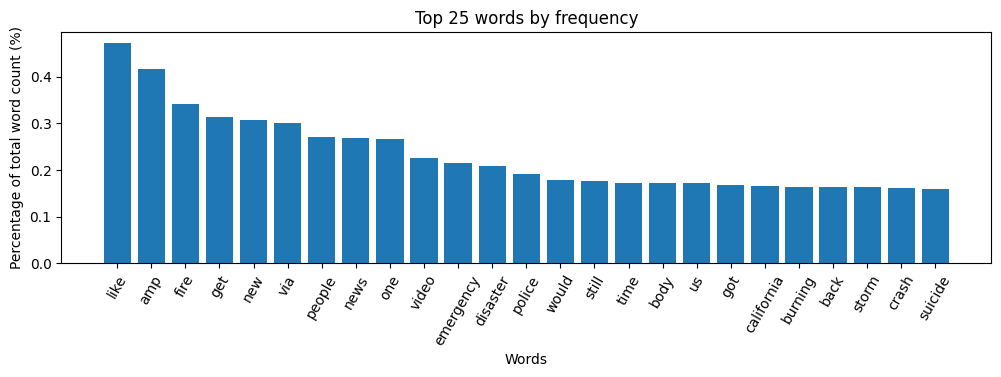

In [ ]:
train_clean_data_seri = pd.Series(train_clean_data)
w = train_clean_data_seri.str.split(expand=True).unstack().value_counts()
print("Word Count")
print(w.head())
print("-"*50)
# Divides each element of a Text column into words separated by whitespace characters and returns a data frame with each word expanded as a new column.

l = w[:25]/np.sum(w)*100
print("Word Ratio")
print(l.head())
print("-"*50)

plt.figure(figsize=(12,3))
plt.bar(l.index, l.values)
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Percentage of total word count (%)')
plt.title('Top 25 words by frequency')
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_clean_data, train_data['target'], test_size = 0.2, random_state = 41)

In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words,oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)

max_len = 200
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = "post", truncating = "post")
test_sequences = tokenizer.texts_to_sequences(X_valid)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = "post", truncating = "post")

# Adding EarlyStopping callback based on ROC AUC
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# build model
model2 = Sequential()
model2.add(Embedding(input_dim = max_words, output_dim=128))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))

# Define a custom learning rate
custom_lr = 0.0003
custom_optimizer = Adam(learning_rate=custom_lr)

# Compile the model with the custom optimizer
model2.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history1 = model2.fit(train_padded, y_train, epochs = 100, batch_size=256, validation_data=(test_padded, y_valid), callbacks=[early_stopping])

Epoch 1/100
24/24 [==============================] - 42s 2s/step - loss: 0.6909 - accuracy: 0.5486 - val_loss: 0.6855 - val_accuracy: 0.5693
Epoch 2/100
24/24 [==============================] - 37s 2s/step - loss: 0.6848 - accuracy: 0.5706 - val_loss: 0.6835 - val_accuracy: 0.5693
Epoch 3/100
24/24 [==============================] - 35s 1s/step - loss: 0.6842 - accuracy: 0.5706 - val_loss: 0.6833 - val_accuracy: 0.5693
Epoch 4/100
24/24 [==============================] - 39s 2s/step - loss: 0.6838 - accuracy: 0.5706 - val_loss: 0.6831 - val_accuracy: 0.5693
Epoch 5/100
24/24 [==============================] - 36s 2s/step - loss: 0.6833 - accuracy: 0.5707 - val_loss: 0.6826 - val_accuracy: 0.5696
Epoch 6/100
24/24 [==============================] - 37s 2s/step - loss: 0.6826 - accuracy: 0.5726 - val_loss: 0.6819 - val_accuracy: 0.5743
Epoch 7/100
24/24 [==============================] - 36s 1s/step - loss: 0.6798 - accuracy: 0.5835 - val_loss: 0.6730 - val_accuracy: 0.5941
Epoch 8/100
2

In [ ]:
# Predict on validation data
y_pred = model2.predict(test_padded)
y_pred = (y_pred > 0.5).astype(int)
y_pred = np.squeeze(y_pred, axis=-1)
y_pred = np.amax(y_pred, axis=-1)

# Calculate F1-score
f1 = f1_score(y_valid, y_pred)
print(f"F1 Score: {f1}")

48/48 [==============================] - 6s 90ms/step
F1 Score: 0.7628865979381443


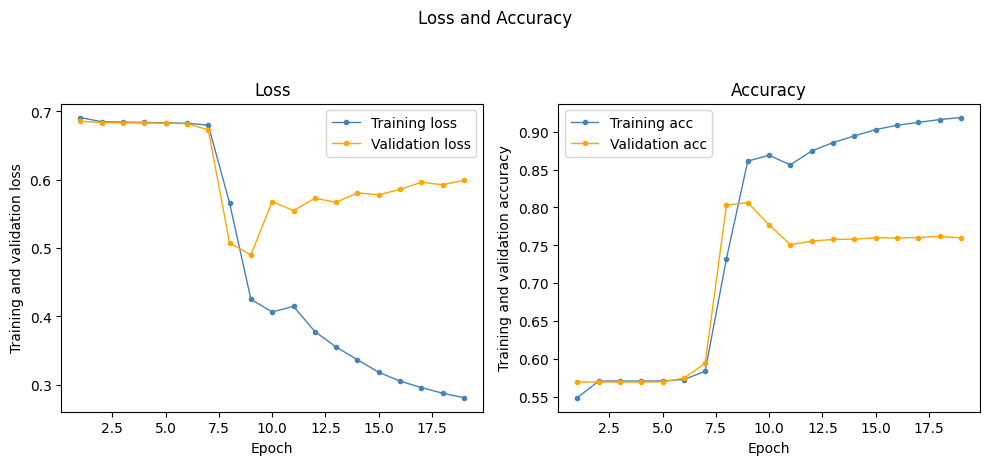

In [ ]:
# display the loss and accuracy curves

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot
n_factor = range(0,100)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Loss and Accuracy")

# Plot loss scores
ax[0, 0].set_title("Loss")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("Training and validation loss")
ax[0, 0].plot(epochs, loss, marker=".", color="steelblue", lw=1, label="Training loss")
ax[0, 0].plot(epochs, val_loss, marker=".", color="orange", lw=1, label="Validation loss")
ax[0, 0].legend()

# Plot accuracy scores
ax[0, 1].set_title("Accuracy")
ax[0, 1].set_xlabel("Epoch")
ax[0, 1].set_ylabel("Training and validation accuracy")
ax[0, 1].plot(epochs, acc, marker=".", color="steelblue", lw=1, label="Training acc")
ax[0, 1].plot(epochs, val_acc, marker=".", color="orange", lw=1, label="Validation acc")
ax[0, 1].legend()

# Remove empty subplot
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

-> The result was about 80% accuracy, the same as before the stopword removal.<br>
-> This may be due to the fact that although we were able to remove meaningless words, the information needed to make decisions about the model did not increase from before the removal of stop words.

# Step5. Compare with other models
The following four models were built and compared with Neural Network model.
- Bag-of-Words + Random Forest<br>
- Bag-of-Words + Logistic Regression<br>
- TF-IDF + Random Forest<br>
- TF-IDF + Logistic Regression<br>

## - Bag-of-Words

Bag-of-Words can be summarized simply as:
- A model that puts words in a sentence into a bag.
- Classification and evaluation based on the number of times a word appears.
- The order of words is not taken into account.

In [ ]:
NUM_MAX_FEATURES = 2000

# Convert text to word vecter(Bag-of-Words)
vectorizer = CountVectorizer(max_features=NUM_MAX_FEATURES)
word_vec = vectorizer.fit(train_clean_data)
X_train_vec = word_vec.transform(train_clean_data)
X_test_vec = word_vec.transform(test_clean_data)

y_train_vec = train_data['target']
y_test_vec = sample_data['target']

feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(X_train_vec.toarray(), columns=feature_names)

,aba,abandoned,abc,abcnews,ablaze,able,absolutely,abstorm,access,accident,...,yyc,zone,û_,ûª,ûªs,ûªt,ûªve,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_vec, y_train_vec, test_size=0.2, random_state=41)
X_train = X_train.toarray()
X_valid = X_valid.toarray()

In [ ]:
print("Random Forest")
params = {'max_depth':[2 ** i for i in range(7, 9)], 'n_estimators':[2 ** i for i in range(7, 9)],}
clf = RandomForestClassifier()
grid = GridSearchCV( clf, params, cv = 5 )
grid = grid.fit(X_train, y_train)
grid.cv_results_ = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
run = grid.cv_results_['mean_fit_time'] + grid.cv_results_['mean_score_time']
test = grid.cv_results_['mean_test_score']
for ru, te, params in zip(run, test, grid.cv_results_['params']):
    print("mean test score = %0.3f,  mean runtime = %0.3f  for %r"% (te, ru, params))

print("□"*50)
print("Logistic Regression")
params = {'C':[2 ** i for i in range(-5, 6)]}
clf3 = LogisticRegression(solver='liblinear')
grid = GridSearchCV( clf3, params, cv = 5 )
grid = grid.fit(X_train, y_train)
grid.cv_results_ = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
run = grid.cv_results_['mean_fit_time'] + grid.cv_results_['mean_score_time']
test = grid.cv_results_['mean_test_score']
for ru, te, params in zip(run, test, grid.cv_results_['params']):
    print("mean test score = %0.3f,  mean runtime = %0.3f  for %r"% (te, ru, params))

Random Forest
mean test score = 0.778,  mean runtime = 31.447  for {'max_depth': 128, 'n_estimators': 128}
mean test score = 0.778,  mean runtime = 56.414  for {'max_depth': 128, 'n_estimators': 256}
mean test score = 0.775,  mean runtime = 38.271  for {'max_depth': 256, 'n_estimators': 128}
mean test score = 0.771,  mean runtime = 79.871  for {'max_depth': 256, 'n_estimators': 256}
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□
Logistic Regression
mean test score = 0.787,  mean runtime = 0.146  for {'C': 0.25}
mean test score = 0.785,  mean runtime = 0.149  for {'C': 0.5}
mean test score = 0.783,  mean runtime = 0.149  for {'C': 0.125}
mean test score = 0.783,  mean runtime = 0.152  for {'C': 1}
mean test score = 0.778,  mean runtime = 0.153  for {'C': 2}
mean test score = 0.778,  mean runtime = 0.174  for {'C': 0.0625}
mean test score = 0.771,  mean runtime = 0.247  for {'C': 4}
mean test score = 0.763,  mean runtime = 0.163  for {'C': 0.03125}
mean test score = 0.762,  mean runt

-> Bag-of-Words + Random Forests and Logistics Regression models were not as accurate as neural networks, but they were somewhat close.

## - TF-IDF

TF-IDF is the product of TF (Term Frequency) and IDF (Inverse Document Frequency):
- TF represents the percentage of occurrences of a word in a document.
- IDF is the degree which the certain word appears in only a portion of the document, not the entire document.

-> So TF-IDF means:
- The target word appears in large numbers in a single document.
- However, the word does not appear frequently throughout the document, but only in some specific documents

In [ ]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf = True
                             , min_df = 5
                             , stop_words = 'english'
                             , norm = 'l2'
                             , encoding = 'latin-1'
                             , ngram_range = (1,2)
                             )
tfidf_vect = vectorizer.fit(train_clean_data)
X_train = tfidf_vect.transform(train_clean_data)
X_test = tfidf_vect.transform(test_clean_data)

y_train = train_data['target']
y_test = sample_data['target']

feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(X_train.toarray(), columns=feature_names)

,aba,aba woman,abandoned,abandoned aircraft,abc,abc news,abcnews,ablaze,able,absolutely,...,ûªs stock,ûªt,ûªt let,ûªt want,ûªve,ûªve home,ûïwhen,ûïwhen saw,ûò,ûó
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


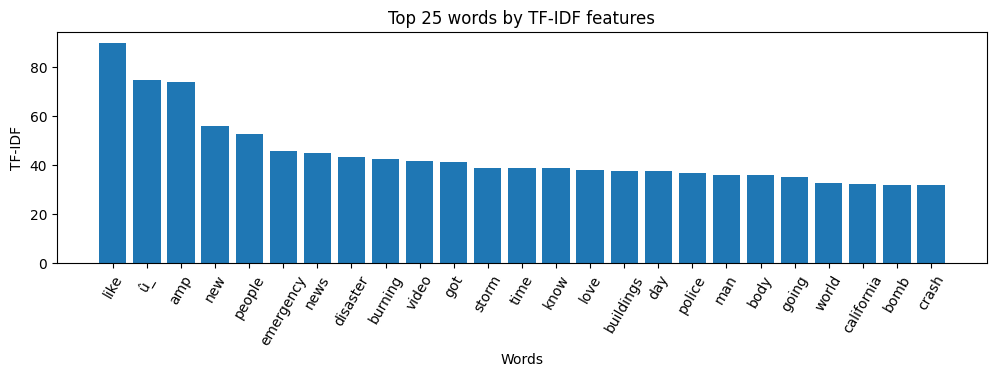

In [ ]:
# TOP25 words
df_vectorized = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
#print(df_vectorized)

top_25_keywords = df_vectorized.sum().nlargest(25)

plt.figure(figsize=(12,3))
plt.bar(top_25_keywords.index, top_25_keywords.values)
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('TF-IDF')
plt.title('Top 25 words by TF-IDF features')
plt.show()

In [ ]:
print("Random Forest")
params = {'max_depth':[2 ** i for i in range(7, 9)], 'n_estimators':[2 ** i for i in range(7, 9)],}
clf = RandomForestClassifier()
grid = GridSearchCV( clf, params, cv = 5 )
grid = grid.fit(X_train, y_train)
grid.cv_results_ = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
run = grid.cv_results_['mean_fit_time'] + grid.cv_results_['mean_score_time']
test = grid.cv_results_['mean_test_score']
for ru, te, params in zip(run, test, grid.cv_results_['params']):
    print("mean test score = %0.3f,  mean runtime = %0.3f  for %r"% (te, ru, params))

print("□"*50)
print("Logistic Regression")
params = {'C':[2 ** i for i in range(-5, 6)]}
clf3 = LogisticRegression(solver='liblinear')
grid = GridSearchCV( clf3, params, cv = 5 )
grid = grid.fit(X_train, y_train)
grid.cv_results_ = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
run = grid.cv_results_['mean_fit_time'] + grid.cv_results_['mean_score_time']
test = grid.cv_results_['mean_test_score']
for ru, te, params in zip(run, test, grid.cv_results_['params']):
    print("mean test score = %0.3f,  mean runtime = %0.3f  for %r"% (te, ru, params))

Random Forest
mean test score = 0.630,  mean runtime = 9.117  for {'max_depth': 256, 'n_estimators': 128}
mean test score = 0.627,  mean runtime = 18.082  for {'max_depth': 256, 'n_estimators': 256}
mean test score = 0.625,  mean runtime = 8.344  for {'max_depth': 128, 'n_estimators': 128}
mean test score = 0.622,  mean runtime = 12.904  for {'max_depth': 128, 'n_estimators': 256}
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□
Logistic Regression
mean test score = 0.680,  mean runtime = 0.018  for {'C': 1}
mean test score = 0.676,  mean runtime = 0.016  for {'C': 0.5}
mean test score = 0.671,  mean runtime = 0.017  for {'C': 0.25}
mean test score = 0.671,  mean runtime = 0.020  for {'C': 2}
mean test score = 0.664,  mean runtime = 0.026  for {'C': 4}
mean test score = 0.650,  mean runtime = 0.027  for {'C': 8}
mean test score = 0.648,  mean runtime = 0.016  for {'C': 0.125}
mean test score = 0.642,  mean runtime = 0.035  for {'C': 16}
mean test score = 0.631,  mean runtime = 0.038 

-> TF-IDF + Random Forest and Logistic Regression models showed less accurate results than that of Bug-of-Words.<br>
->  This is likely due to the prior removal of unnecessary words, making the number of remaining meaningful words more important.

# 5. Submission

In [ ]:
#submission
max_len = 200
sub_sequences = tokenizer.texts_to_sequences(test_clean_data)
sub_padded = pad_sequences(sub_sequences, maxlen=max_len, padding="post", truncating="post")

predictions = model2.predict(sub_padded)
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions = np.squeeze(binary_predictions, axis=-1)
binary_predictions = np.amax(binary_predictions, axis=-1)

test_data['target'] = binary_predictions
print(test_data[['id', 'text', 'target']])

submit = test_data[['id', 'target']]
submit.to_csv('drive/My Drive/Colab Notebooks/DTSA_5511_WEEK4/submission.csv', index=False)

102/102 [==============================] - 7s 71ms/step
         id                                               text  target
0         0                 Just happened a terrible car crash       1
1         2  Heard about #earthquake is different cities, s...       1
2         3  there is a forest fire at spot pond, geese are...       1
3         9           Apocalypse lighting. #Spokane #wildfires       0
4        11      Typhoon Soudelor kills 28 in China and Taiwan       1
...     ...                                                ...     ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...       1
3259  10865  Storm in RI worse than last hurricane. My city...       1
3260  10868  Green Line derailment in Chicago http://t.co/U...       1
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...       1
3262  10875  #CityofCalgary has activated its Municipal Eme...       1

[3263 rows x 3 columns]


-> I submitted the result to Kaggle and got score"0.754".


# 6.Summary

The following 6 models were created for this project:
- 1. Neural Network model -> Val Accuracy:0.808<br>
- 2. Data Cleaning + Neural Network model -> Val Accuracy:0.806<br>
- 3. Bag-of-Words + Random Forest -> Val Accuracy:0.778<br>
- 4. Bag-of-Words + Logistic Regression -> Val Accuracy:0.787<br>
- 5. TF-IDF + Random Forest -> Val Accuracy:0.630<br>
- 6. TF-IDF + Logistic Regression -> Val Accuracy:0.680<br>

The result of No.2 was about 80% accuracy, the same as before the stopword removal.This may be due to the fact that although we were able to remove meaningless words, the information needed to make decisions about the model did not increase from before the removal of stop words.<br>
TF-IDF + Random Forest and Logistic Regression models(No.5&No.6) showed less accurate results than that of Bug-of-Words(No.3&No.4).<br>This is likely due to the prior removal of unnecessary words, making the number of remaining meaningful words more important.

The following points may be taken to improve accuracy in the future:<br>
 - Use of keyword columns (Although this columns may be meaningful for prediction, I did not use this to standardize the columns used for comparison of various models).<br>
 - Increase max_features in the bag-of-words column (the upper limit is set at 2000 for this case due to run time issues).